In [ ]:
import pandas as pd
df = pd.DataFrame()
row1 = {'大口径-论文数':355,'小口径-论文数':49,'国家社科基金项目数':10,'国家自然基金项目数':15,'教育部项目数':5,'教材数':153}
row2 = {'大口径-论文数':128,'小口径-论文数':99,'国家社科基金项目数':17,'国家自然基金项目数':18,'教育部项目数':4,'教材数':122}
row3 = {'大口径-论文数':179,'小口径-论文数':23,'国家社科基金项目数':3,'国家自然基金项目数':8,'教育部项目数':0,'教材数':9}

df = df.append(row1,ignore_index=True)
df = df.append(row2,ignore_index=True)
df = df.append(row3,ignore_index=True)
df.rename(index={0:'应用经济学',1:'工商管理',2:'统计学'})

In [1]:
#统计图
import pandas as pd
d1 = pd.read_excel('datas/应用经济学-高校年度发文数统计.xlsx')
d2 = pd.read_excel('datas/工商管理-高校年度发文数统计.xlsx')
d3 = pd.read_excel('datas/统计学-高校年度发文数统计.xlsx')

x = [2016,2017,2018,2019]
y1 = {}
for index, row in d1.iterrows():
    if row['高校名称'] == '首都经济贸易大学':
        for item in x:
            if str(item) == str(row['发表年份']):
                y1[item] = row['论文数']
y2 = {}
for index, row in d2.iterrows():
    if row['高校名称'] == '首都经济贸易大学':
        for item in x:
            if str(item) == str(row['发表年份']):
                y2[item] = row['论文数']
y3 = {}
for index, row in d3.iterrows():
    if row['高校名称'] == '首都经济贸易大学':
        for item in x:
            if str(item) == str(row['发表年份']):
                y3[item] = row['论文数']

y1 = [y1[key] for key in y1]
y2 = [y2[key] for key in y2]
y3 = [y3[key] for key in y3]

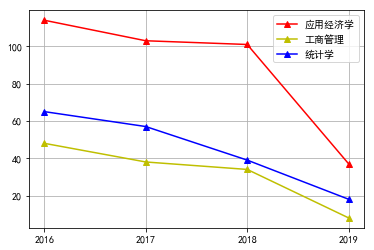

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.grid()
plt.plot(x,y1,'r-',marker='^',label='应用经济学')
plt.plot(x,y2,'y-',marker='^',label='工商管理')
plt.plot(x,y3,'b-',marker='^',label='统计学')
plt.xticks(x)
plt.legend()
plt.show()

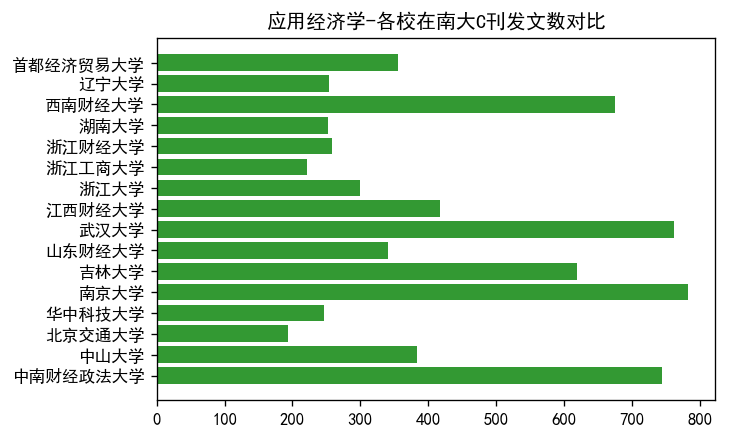

In [9]:
#高校发文数对比
import numpy as np

data = pd.read_excel('datas/大口径-应用经济学-统计表.xlsx')
x = np.arange(len(data))
counts = data['入围数统计']
col = [x for x in data['高校名称']]
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title('应用经济学-各校在南大C刊发文数对比')
plt.barh(col,counts,color='g',alpha=0.8)
plt.show()

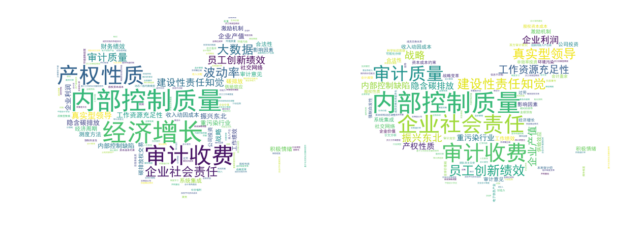

In [7]:
#关键词云
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('datas/首都经济贸易大学-统计学.xlsx')
data2 = pd.read_excel('datas/首都经济贸易大学-工商管理.xlsx')
data.keys()

kws = data['Keyword-关键词']
kws2 = data2['Keyword-关键词']
all_kw = []

for index,item in kws.items():
    kw = item.split(';')
    kw = [x for x in kw if x.strip() != '']
    all_kw = all_kw + kw
# with open('word.txt','w') as f:
#     f.write(str(all_kw))
all_kw2 = []
for index,item in kws2.items():
    kw = item.split(';')
    kw = [x for x in kw if x.strip() != '']
    all_kw2 = all_kw2 + kw

from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

texts = ' '.join(all_kw)
texts2 = ' '.join(all_kw2)

alice_coloring = np.array(Image.open('china.jpg'))
wordcloud = WordCloud(background_color='white',mask=alice_coloring,font_path='C:\\Windows\\Fonts\\simhei.ttf').generate(texts)
#print('首经贸-工商管理-关键词云')
plt.subplot(121)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['savefig.dpi'] = 80 #图片像素
plt.rcParams['figure.dpi'] = 120 #分辨率
#plt.title('首经贸-工商管理-关键词云')
#plt.savefig('年度热点/' + key + '.jpg')
plt.subplot(122)
wordcloud2 = WordCloud(background_color='white',mask=alice_coloring,font_path='C:\\Windows\\Fonts\\simhei.ttf').generate(texts2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.rcParams['savefig.dpi'] = 80 #图片像素
plt.rcParams['figure.dpi'] = 120 #分辨率
plt.show()